In [1]:
import numpy as np
from numpy import linalg as LA
from textblob import TextBlob
import pandas as pd

In [2]:
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.colors import Color


# Making Our visualizations pretty
sns.set_style('whitegrid')

# Cool text visualization
import scattertext as st

# Regular Expressions
import re

# Preprocessing for my NLP text & voice recognition 
import spacy
import nltk

from nltk.corpus import stopwords
from nltk.corpus import reuters 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import yaml
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import re
import string
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn import svm
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve,confusion_matrix, f1_score
from nltk.corpus import stopwords
#from autocorrect import Speller
from matplotlib import pyplot as plt
from collections import Counter,Counter,defaultdict
from scipy.linalg import svd
from autocorrect import Speller
from sklearn.tree import DecisionTreeClassifier
#spell = Speller(lang='en')
%matplotlib inline
warnings.filterwarnings('ignore')
spell = Speller(lang='en')
sns.set_style("whitegrid")


In [4]:
df=pd.read_csv('reviews.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20647 entries, 0 to 20646
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stars     20647 non-null  float64
 1   comment   20647 non-null  object 
 2   book_url  20647 non-null  object 
dtypes: float64(1), object(2)
memory usage: 484.0+ KB


In [6]:
df.isnull()

,stars,comment,book_url
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
20642,False,False,False
20643,False,False,False
20644,False,False,False
20645,False,False,False


In [7]:
df

,stars,comment,book_url
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130
...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482
20643,5.0,"Am disabled, retired RN, but always wished I w...",https://www.amazon.com/dp/0980200482
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482
20645,5.0,"Overall, I think this is an excellent resource...",https://www.amazon.com/dp/0980200482


In [8]:
df.stars.value_counts()

5.0    13963
4.0     2894
3.0     1431
1.0     1430
2.0      929
Name: stars, dtype: int64

# Preprocessing

In [9]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['comment'] = df.comment.map(alphanumeric).map(punc_lower)
df.head()

,stars,comment,book_url
0,5.0,let me say at the outset of this review that ...,https://www.amazon.com/dp/1492041130
1,1.0,its capitalism at its best i read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,if you re looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,in general this is a good book it covers a w...,https://www.amazon.com/dp/1492041130
4,5.0,i was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130


In [10]:
df.drop(columns={'book_url','stars'},inplace=True)

In [11]:
df.drop_duplicates(inplace=True)
df

,comment
0,let me say at the outset of this review that ...
1,its capitalism at its best i read the book fr...
2,if you re looking to get started with data sci...
3,in general this is a good book it covers a w...
4,i was an academic data scientist decades befor...
...,...
20641,as someone who doesn t know much about library...
20642,this book offers nice information and thoughts...
20643,am disabled retired rn but always wished i w...
20644,at one point i considered library work as oppo...


In [12]:
mystopword=['resource','general','at','read','important','respect','single',
           'term','images','believe','besides','anyone','many','beginners','peresent','overall','chapter',
           'people','class','hands','someone','ideas','thinking','how to','two','my job','opened','even','uh','graduate',
            'student','social', 'psychology','transition','into','side','job','examples','example','classes','somewhat',
            'person','seriously','excel','course','teach','match','users','tool','started','my mind','mind','my openins'
           ,'project','time','spent','anyway','design','powerpoint','career','field','point','fields','following',
           'working','chapters','freshman','college-freshman','retains','matter','whether'
           ,'however','leading','starting','write','choices','whatsoever','knowlegde','name','approach','guy'
           'writing','download','second','makes','collection','handbook','interviews','interview','answer'
           ,'consume','econometrics','found','provided','appendix','table','table a','appendix a','impression'
           ,'background','research','modelling','hang on','among','words','sentences','even','paragraphs'
            ,'introduction','ways','designed','probably','induces','son','my son','newborn','function',
            'refreshing','installation','newbie','walk','environment','sections','works','archetype','bodes','code','everyone'
            ,'dummies','numerous','factors','models','network','consider','talking','let','say','joke','calculus','education',
           'algebra','subject','stat','dealing','doubly','segmentation','ph','alot','ago','tldr','alongside','equation',
            'tour','crumb','thing','applied','ga','sw','guide','guile','trying','attack','touch','bread','various'
            ,'image','ai','leaf','statistic','outset','human','plan','math','degree','true','darned','joke'
           ,'book','lgbtq','account','auther','thought','always','included','amazon','already','although','page','although','attribute',
            'area','wheelan','usually','woman','actually','repeat','year','also','daughter','machine','zumel',
            'zorach','zork','zuboff','zuck','zuckerberg','zuse','zynga','nan','textbook','make','need','seem','auther'
           ,'author','good','first','last','work','find','think','possible','password','email','much','book','read','whole'
            ,'seems','like','liked','device','system','computer','kids','chileds','books','reading','write','reader','take','look'
            ,'long','used','well'

           ]





In [13]:
setstop = set(mystopword) # To get the unique word only

In [14]:
stopls = list(setstop) # convert from set to list

In [15]:
def clean_text(text):
    # remove all word contain uneccassry and integer
    
    text = re.sub("]", "", text)
    #remove URLs
    text = re.sub(r"http\S+", "", text,flags=re.U)    

    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#\w+','', text)
    text = re.sub("\n", " ", text)
    text = re.sub(' +', ' ', text)  # removing unnecessary spaces
    text= re.sub('\w*\d\w*','',text)
    

    return text.strip()

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
 #   def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    stop_words=set(nltk.corpus.stopwords.words('english'))
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

   # return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
#def lemmatize_stemming():
 #   return stemmer.stem(WordNetLemmatizer().lemmatize(comment, pos='v'))

In [17]:
def remove_repeated_letters(text):
    
    text = re.sub(r'(.)\1+', r'\1\1', text)  
   # text = re.sub(r'(.)\1+', r'\1', text) 

    return text

## Remove Stopwords by checking in two lists the one we make and the original english stopwords

In [18]:
def only_english(x):
    ''' Making a function that only accepts English by appending True if it is English and False otherwise 
            into a mask. Returns a mask'''    
    mask = []
    x = x.apply(" ".join)
    try:
        for i,doc in tqdm(enumerate(nlp_cld.pipe(x, batch_size=512))):
            if 'en' not in doc._.languages or len(doc._.languages) != 1:
                mask.append(False)
            else:
                mask.append(True)
    except Exception as e:
        print(f"Exception:{e}")
    return mask

In [19]:
def remove_stopwords(text):
    stop_words=set(nltk.corpus.stopwords.words('english'))
    text_list = text.split(' ')  # to remove stopwords easily  
    new_text_list = []
    for s in text_list:
        if not (s in stop_words) and not(s in stopls): #Checks two lists
            new_text_list.append(s)
        
    text = ' '.join(e for e in new_text_list)  # gather text together again

    return text
    

In [20]:
stop_words=set(nltk.corpus.stopwords.words('english'))
print(stop_words)

{"you're", 'for', 'any', 'shan', 'of', 'where', 'theirs', 'after', 'so', 'had', 'before', 'down', 'most', 'll', 'if', 'it', 'm', 'with', 'shouldn', 'been', 'our', 'ain', 'or', "she's", 'you', 'very', 'he', 'was', 'don', 'didn', "hadn't", 'myself', 'some', 'himself', 'wasn', 'off', 'will', 'd', 'hadn', 'him', 'your', 'these', 'those', 'such', 'won', 'are', "should've", 'yours', 'over', "haven't", 'only', 'did', 'them', "you've", 'ours', 'y', 'has', "isn't", 'they', "couldn't", 'whom', 'weren', 'have', 'a', 'am', 'about', 't', "shan't", 'while', 'at', 'not', 'just', 's', 'on', "aren't", 'which', 'both', 'from', 'each', 'own', 'having', "mustn't", 'to', 'herself', 'more', 'be', 'does', 'itself', 'this', "that'll", "it's", 'no', "won't", "you'll", 'the', "shouldn't", 'same', 'themselves', 'hers', "you'd", 'yourself', 'doesn', 'wouldn', 'up', 'because', 'now', 'mightn', 'were', 'below', 'her', 'during', 'needn', 'between', 'how', 'nor', "weren't", 'who', 'his', 'too', 'against', 're', 'then

In [21]:
for i in stop_words:
    if i=='OK':
        print(i)

In [22]:
def preprocess_text(text):
    # clean text
    text = clean_text(text)
  
    # remove repeated letters
    text = remove_repeated_letters(text)

    # remove stopwords
    text = remove_stopwords(text)
    #text=only_english(text)
    

    return text

In [23]:
df['comment'] = df['comment'].apply(preprocess_text)

In [24]:
#drop non english 

df = df[df['comment'].map(lambda x: x.isascii())]

In [25]:
df['comment'] = df.comment.apply(lemmatize_text)

In [26]:
#Part of Speech
from nltk.tag import pos_tag

dfm = pd.DataFrame({'words':['dl','ml','ds','data science']})

df['POS'] = dfm['words'].apply(lambda x: nltk.pos_tag([x])[0][1])


In [27]:
df.to_csv("BookOpinionsDS_clean.csv")

In [28]:
df=pd.read_csv('BookOpinionsDS_clean.csv',index_col=0)

In [29]:
df

,comment,POS
0,review sheer level topic engineer year enginee...,NN
1,capitalism best nearby bookstore reviewer gray...,NN
2,looking data science confused material video s...,NN
3,cover wide variety topic go enough detail trou...,NN
4,academic data scientist decade coined love mot...,NaN
...,...,...
20641,know library information science except intere...,NaN
20642,offer nice information thought becoming librar...,NaN
20643,disabled retired wished librarian perhaps enco...,NaN
20644,considered library opposed literacy profit lib...,NaN


In [30]:
df.shape

(17497, 2)

# WordCloud after clean

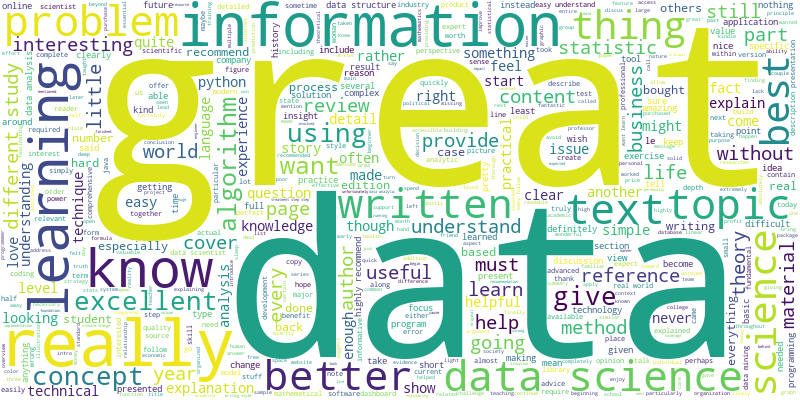

In [31]:
from wordcloud import WordCloud
texts = ' '.join(str(list(df['comment'])).split())
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(texts)
wordcloud.to_file("worCloud_Basic.png")
wordcloud.to_image()

# 3.Vectorization

3.1 CountVectorization

In [32]:
vectorizer= CountVectorizer(stop_words=stopls)
cv= vectorizer.fit_transform(df['comment'].apply(lambda x: np.str_(x)))
cv.shape

(17497, 25011)

In [33]:
cv

<17497x25011 sparse matrix of type '<class 'numpy.int64'>'
	with 435411 stored elements in Compressed Sparse Row format>

In [34]:
data_cv = pd.DataFrame(cv.toarray(),columns = vectorizer.get_feature_names())
data_cv

,aamc,aaron,aback,abandon,abandoned,abandoning,abandonment,abbot,abbott,abbreviated,...,ziped,zombie,zone,zoo,zookeeper,zookeper,zoology,zoom,zoomed,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3.2 CountVectorization Using (1, 2) Grams:

In [35]:
#CV_grams = CountVectorizer(stop_words= stopls, ngram_range = (1,2))
#CV_grams_ = CV_grams.fit_transform(df['comment'].apply(lambda x: np.str_(x)))
#CV_grams_.shape

In [36]:
#data_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names())
#data_grams 

3.3 TfidfVectorizer Using (1, 2) Grams

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
CV_TF_IDF = TfidfVectorizer(stop_words= stopls)
tfidf = CV_TF_IDF.fit_transform(df['comment'].apply(lambda x: np.str_(x)))
tfidf.shape

(17497, 25011)

In [38]:
dftf = pd.DataFrame(tfidf.toarray(),columns = CV_TF_IDF.get_feature_names())
dftf

,aamc,aaron,aback,abandon,abandoned,abandoning,abandonment,abbot,abbott,abbreviated,...,ziped,zombie,zone,zoo,zookeeper,zookeper,zoology,zoom,zoomed,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Topic modeling

In [39]:
def display_topics(model, feature_names, no_top_words, topic=None):
    for ix, top in enumerate(model.components_):
        if not topic or not topic[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic '",topic[ix],"'")
        print(", ".join([feature_names[i]
                        for i in top.argsort()[:-no_top_words - 1:-1]]))

## 4.1 LSA

 4.1.1 LSA and CountVectorization

In [40]:
lsa_ = TruncatedSVD(5)
tw_dial = lsa_.fit_transform(cv)
# the percentage of variance that is attributed by each of the selected components/topics
lsa_.explained_variance_ratio_

array([0.07392488, 0.02463201, 0.01419335, 0.01257244, 0.01226141])

In [41]:
display_topics(lsa_, vectorizer.get_feature_names(),30)


Topic  0
data, science, would, information, learning, problem, analysis, scientist, great, topic, business, using, really, know, concept, better, want, understand, algorithm, different, structure, world, could, learn, give, part, text, level, technique, real

Topic  1
would, learning, information, problem, could, theory, behe, great, really, level, concept, text, know, understand, world, want, language, algorithm, better, life, change, part, best, topic, without, give, learn, evidence, natural, written

Topic  2
filler, submit, business, python, text, sleep, really, profit, algorithm, analytics, learn, analysis, programming, feel, better, material, little, reference, campaign, climate, written, method, start, give, recommend, mike, want, high, excellent, hard

Topic  3
behe, natural, evidence, change, argument, evolution, information, scientific, selection, intelligent, claim, scientist, data, view, biological, living, darwin, could, family, structure, service, mutation, often, fact, 

4.1.2 LSA and TfidfVectorizer

In [42]:
lsa = TruncatedSVD(n_components=5, random_state=42)
lsa.fit(tfidf)

TruncatedSVD(n_components=5, random_state=42)

In [43]:
display_topics(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=50)


Topic  0
data, great, science, learning, easy, understand, python, would, really, concept, excellent, recommend, information, written, learn, algorithm, topic, want, analysis, useful, best, reference, know, highly, text, basic, problem, help, programming, cover, better, give, using, explanation, clear, interesting, helpful, understanding, business, follow, material, level, structure, practical, real, love, must, theory, looking, knowledge

Topic  1
great, condition, price, product, easy, arrived, came, intro, service, shape, thank, love, delivery, info, rental, perfect, seller, thanks, fast, lot, naruto, quality, shipping, informative, delivered, described, school, oil, gift, cancer, expensive, brand, insightful, starter, item, deal, leaner, ready, inspiring, loving, comprehend, requirement, biology, qualitative, jack, grandson, summer, shipped, advertised, packaging

Topic  2
data, science, great, analysis, mining, scientist, analytics, business, visualization, structure, management,

# 4.2 NMF

4.2.1 NMF and CountVectorization

In [44]:
NMF_= NMF(n_components=5, random_state=42)
NMF_.fit(cv)

NMF(n_components=5, random_state=42)

In [45]:
display_topics(model=NMF_, feature_names=vectorizer.get_feature_names(), no_top_words=30)


Topic  0
data, science, scientist, business, analysis, organization, using, model, within, structure, topic, mining, analytics, visualization, technique, different, company, application, problem, engineer, know, database, skill, practical, better, case, process, type, management, information

Topic  1
learning, would, great, problem, really, concept, algorithm, text, topic, understand, science, learn, want, know, could, language, recommend, better, level, written, python, programming, theory, give, method, cover, basic, easy, review, understanding

Topic  2
filler, submit, algorithm, business, campaign, section, hard, text, profit, feel, another, real, could, concept, issenberg, something, little, professor, really, election, pure, sentence, sure, decided, story, voter, bush, george, figure, space

Topic  3
behe, natural, evidence, argument, change, evolution, scientific, selection, intelligent, structure, claim, would, could, scientist, theory, biological, view, since, level, science

4.2.2 NMF and TfidfVectorizer

In [46]:
NMF_ = NMF(n_components=5, random_state=42)
NMF_.fit(tfidf)

NMF(n_components=5, random_state=42)

In [47]:
display_topics(model=NMF_, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=30)


Topic  0
learning, would, really, python, information, algorithm, recommend, concept, topic, learn, want, problem, best, know, written, text, better, programming, cover, basic, useful, highly, give, theory, explanation, interesting, could, help, material, helpful

Topic  1
great, condition, price, product, information, intro, love, came, service, reference, quality, shape, thank, arrived, python, perfect, delivery, recommend, lot, info, insight, thanks, informative, fast, school, highly, rental, seller, help, worth

Topic  2
data, science, analysis, mining, analytics, scientist, business, structure, visualization, technique, python, using, concept, practical, want, useful, must, provides, understanding, interested, real, step, industry, technical, overview, skill, recommend, management, world, professional

Topic  3
easy, understand, follow, written, concept, informative, clear, simple, helpful, interesting, help, comprehensive, organized, useful, learn, beginner, explanation, made, c

# 4.3 LDA

In [48]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,learning_method='batch',random_state=42,max_iter=10)
lda_fitted=lda_model.fit(cv)

In [49]:
display_topics(model=lda_fitted, feature_names=vectorizer.get_feature_names(), no_top_words=30)


Topic  0
information, business, theory, life, could, history, interesting, would, want, profit, every, know, never, really, feel, back, part, world, food, diet, something, filler, technology, give, greger, campaign, money, quantum, going, based

Topic  1
life, world, change, fact, would, better, know, study, issue, problem, data, future, scientific, based, black, science, climate, evidence, could, health, story, political, every, real, argument, truth, interesting, case, never, view

Topic  2
would, problem, version, text, edition, content, really, great, kindle, know, review, better, quality, could, cover, material, little, star, concept, written, topic, understand, online, bought, give, information, algorithm, explanation, hard, question

Topic  3
data, learning, science, python, analysis, concept, topic, algorithm, would, learn, great, using, basic, method, understand, text, technique, excellent, level, programming, want, best, useful, problem, understanding, cover, reference, reco

In [50]:
display_topics(model=lda_fitted, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=50)


Topic  0
information, business, theory, life, could, history, interesting, would, want, profit, every, know, never, really, feel, back, part, world, food, diet, something, filler, technology, give, greger, campaign, money, quantum, going, based, message, friend, story, right, keep, must, communication, number, everything, discussion, still, better, since, month, review, written, idea, negotiation, wolfram, might

Topic  1
life, world, change, fact, would, better, know, study, issue, problem, data, future, scientific, based, black, science, climate, evidence, could, health, story, political, every, real, argument, truth, interesting, case, never, view, right, often, want, child, must, come, prediction, understand, made, decision, result, give, show, society, global, best, scientist, really, information, without

Topic  2
would, problem, version, text, edition, content, really, great, kindle, know, review, better, quality, could, cover, material, little, star, concept, written, topic, u

# 5. Lable Comment

In [91]:
topic_results =NMF_.transform(tfidf)

df['topics'] = topic_results.argmax(axis=1)

In [92]:
data_lable = df.reset_index()

In [93]:
data_lable.topics.value_counts()

0    10355
2     2801
1     1891
3     1365
4     1085
Name: topics, dtype: int64

In [94]:
conditions = [data_lable['topics'] == 0, data_lable['topics'] == 1,data_lable['topics'] == 2,data_lable['topics'] == 3,data_lable['topics'] == 4]

In [95]:
lable =["AI","ML","DL","DS","Data analysis"]

In [96]:
data_lable['Field'] = np.select(conditions, lable,default = np.nan)

In [97]:
data_lable.head()

,index,comment,POS,topics,Field
0,0,review sheer level topic engineer year enginee...,NN,2,DL
1,1,capitalism best nearby bookstore reviewer gray...,NN,0,AI
2,2,looking data science confused material video s...,NN,2,DL
3,3,cover wide variety topic go enough detail trou...,NN,0,AI
4,4,academic data scientist decade coined love mot...,NaN,2,DL


In [98]:
topics=pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])])

In [99]:
topics = topics.reset_index()

In [100]:
topics.head(10)

,index,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,0,0.035352,0.018489,0.076086,0.029658,0.000000
1,1,0.022402,0.017653,0.015598,0.000000,0.000317
2,2,0.021999,0.034368,0.047210,0.000000,0.000000
3,3,0.037721,0.000000,0.020507,0.000000,0.000000
4,4,0.035143,0.000720,0.099528,0.000000,0.034351
5,5,0.047674,0.001384,0.036773,0.000000,0.000000
6,6,0.006911,0.038085,0.048487,0.000000,0.000000
7,7,0.031187,0.000000,0.102340,0.000258,0.000584
8,8,0.022587,0.047248,0.063698,0.000000,0.000000
9,9,0.000000,0.001968,0.101511,0.000577,0.002806


In [101]:
topicss = data_lable.merge(topics, on=df.comment, how='left')

In [102]:
topicss.drop(['key_0', 'index_x','index_y'],axis='columns', inplace=True)

In [103]:
topicss=topicss.drop_duplicates(subset='comment')

In [104]:
topicss=topicss.rename(columns={'Topic_0': 'AI', 'Topic_1': 'ML','Topic_2': 'DL'
                                 ,'Topic_3': 'DS','Topic_4': 'Data analysis'})

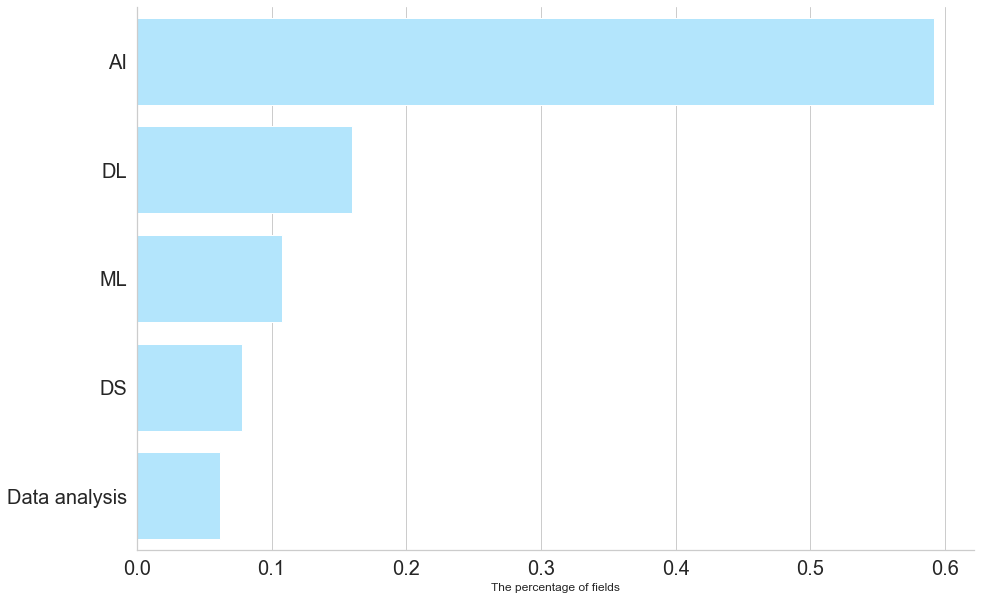

In [105]:
plt.figure(figsize=(15,10))
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=data_lable['Field'].value_counts().index, 
            x=data_lable['Field'].value_counts(normalize=True, ascending=False), 
            data=data_lable, orient='h', 
            color='#b3e5fc',saturation=1
           )
plt.xlabel('The percentage of fields', fontsize=12)
# plt.ylabel(fontsize=12, **t_font)

sns.despine();

# Topics Word Clouds


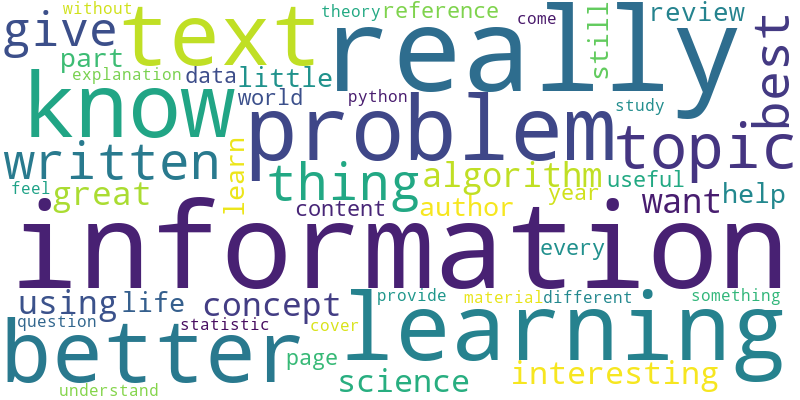

In [106]:
# Create a WordCloud 
ai_df = data_lable[(data_lable['Field']=='AI')]

long_string = ','.join(str(list(ai_df.comment)).split())

#texts = ' '.join(str(list(df['comment'])).split())
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_file("worCloud_AI.png")
wordcloud.to_image()

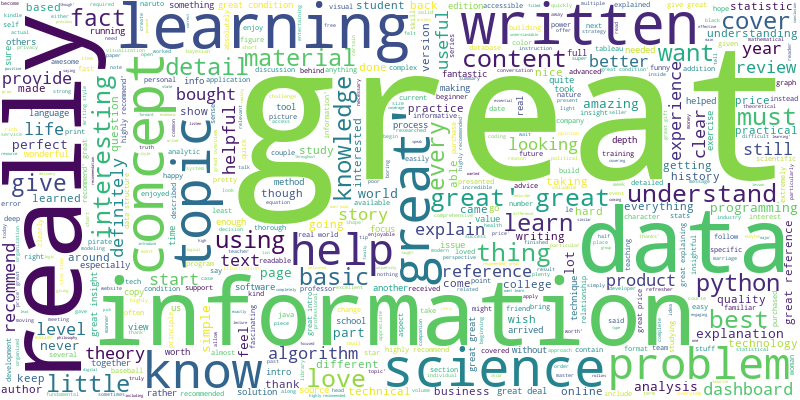

In [107]:
# Create a WordCloud 
ml_df = data_lable[(data_lable['Field']=='ML')]

long_string = ','.join(str(list(ml_df.comment)).split())

#texts = ' '.join(str(list(df['comment'])).split())
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_file("worCloud_ML.png")
wordcloud.to_image()

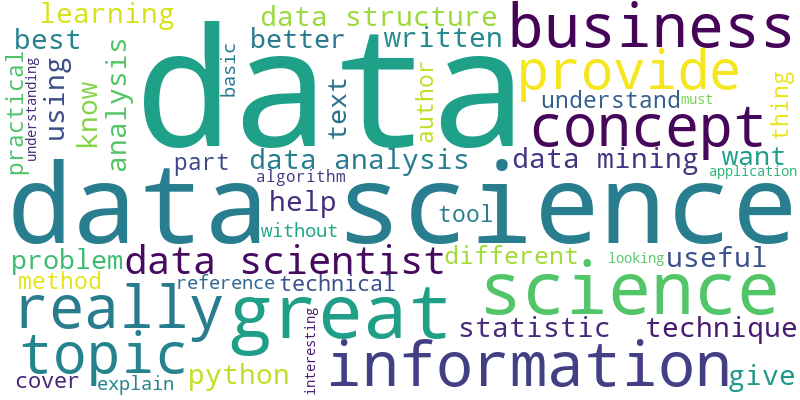

In [108]:
# Create a WordCloud 
dl_df = data_lable[(data_lable['Field']=='DL')]

long_string = ','.join(str(list(dl_df.comment)).split())

#texts = ' '.join(str(list(df['comment'])).split())
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_file("worCloud_DL.png")
wordcloud.to_image()

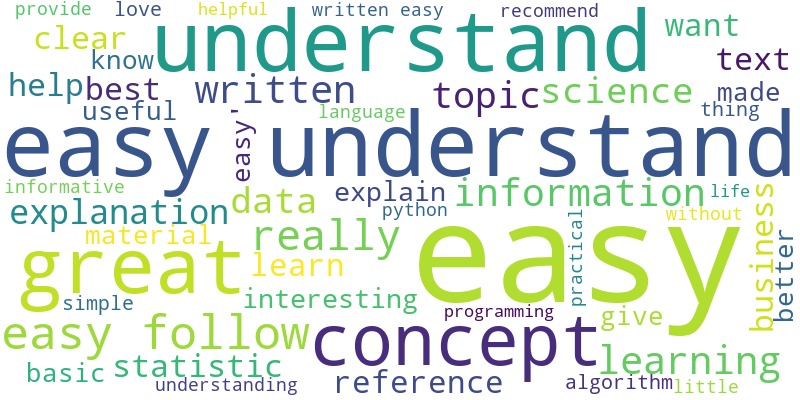

In [109]:
# Create a WordCloud 
ds_df = data_lable[(data_lable['Field']=='DS')]

long_string = ','.join(str(list(ds_df.comment)).split())

#texts = ' '.join(str(list(df['comment'])).split())
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_file("worCloud_DS.png")
wordcloud.to_image()

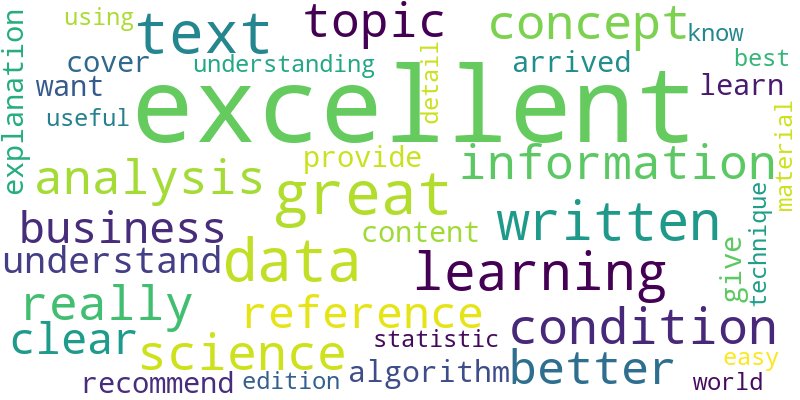

In [110]:
# Create a WordCloud 
dy_df = data_lable[(data_lable['Field']=='Data analysis')]

long_string = ','.join(str(list(dy_df.comment)).split())

#texts = ' '.join(str(list(df['comment'])).split())
wordcloud = WordCloud(background_color="white", max_words=40, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_file("worCloud_data.png")
wordcloud.to_image()

In [111]:
data_lable

,index,comment,POS,topics,Field
0,0,review sheer level topic engineer year enginee...,NN,2,DL
1,1,capitalism best nearby bookstore reviewer gray...,NN,0,AI
2,2,looking data science confused material video s...,NN,2,DL
3,3,cover wide variety topic go enough detail trou...,NN,0,AI
4,4,academic data scientist decade coined love mot...,NaN,2,DL
...,...,...,...,...,...
17492,20641,know library information science except intere...,NaN,0,AI
17493,20642,offer nice information thought becoming librar...,NaN,0,AI
17494,20643,disabled retired wished librarian perhaps enco...,NaN,0,AI
17495,20644,considered library opposed literacy profit lib...,NaN,0,AI


# Clustring

In [112]:
from sklearn.cluster import KMeans

In [113]:
vectorizer= CountVectorizer(stop_words=stopls)
cv= vectorizer.fit_transform(data_lable['comment'].apply(lambda x: np.str_(x)))
cv.shape

km = KMeans(n_clusters=2,random_state=10)
cluster_labels=km.fit_predict(cv)
data_lable['cluster']=cluster_labels

In [114]:
data_lable['cluster'].value_counts()

1    17243
0      254
Name: cluster, dtype: int64

# Validation
by using different models

# Prepare data for modeling

In [115]:
# Split the data into X and y data sets
X = topicss.comment.apply(lambda x: np.str_(x))
y = topicss.Field

In [116]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams

cv1 = TfidfVectorizer(stop_words= stopls)

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aamc,aback,abandon,abandoned,abandoning,abandonment,abbott,abbreviated,abbreviation,abby,...,ziped,zombie,zone,zoo,zookeeper,zookeper,zoology,zoom,zoomed,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## First one Classification
To convert Unsupervised learning to Supervisod learning

In [118]:
# Create a logistic regression model to use for converting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score
lr = LogisticRegression()

In [119]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [120]:
print(classification_report(y_test,y_pred_cv1))

               precision    recall  f1-score   support

           AI       0.87      0.99      0.93      3011
           DL       0.95      0.83      0.89       854
           DS       0.99      0.72      0.83       409
Data analysis       0.98      0.71      0.83       299
           ML       0.99      0.77      0.86       517

     accuracy                           0.91      5090
    macro avg       0.96      0.81      0.87      5090
 weighted avg       0.91      0.91      0.90      5090



In [121]:
print("Logistic Regression Accuracy=",accuracy_score(y_test, y_pred_cv1))
print("Logistic Regression F1 score=",f1_score(y_test, y_pred_cv1, average='micro'))

Logistic Regression Accuracy= 0.9055009823182711
Logistic Regression F1 score= 0.9055009823182711


Try classifying using Naive Bayes

In [122]:
# Fit the first Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [123]:
print(classification_report(y_test,y_pred_cv1_nb))

               precision    recall  f1-score   support

           AI       0.60      1.00      0.75      3011
           DL       0.88      0.04      0.07       854
           DS       1.00      0.00      0.01       409
Data analysis       1.00      0.01      0.02       299
           ML       1.00      0.01      0.03       517

     accuracy                           0.60      5090
    macro avg       0.90      0.21      0.17      5090
 weighted avg       0.74      0.60      0.46      5090



In [124]:
print("Naive Bayes Accuracy=",accuracy_score(y_test,y_pred_cv1_nb))
print("Naive Bayes F1 score=",f1_score(y_test, y_pred_cv1_nb, average='micro'))

Naive Bayes Accuracy= 0.599803536345776
Naive Bayes F1 score= 0.599803536345776


Try classifying using SVM

In [125]:
SVM = SVC(kernel='linear')
SVM.fit(X_train_cv1,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_cv1)

In [126]:
print(classification_report(y_test,predictions_SVM))

               precision    recall  f1-score   support

           AI       0.92      0.98      0.95      3011
           DL       0.95      0.89      0.92       854
           DS       0.95      0.82      0.88       409
Data analysis       0.94      0.83      0.88       299
           ML       0.96      0.86      0.91       517

     accuracy                           0.93      5090
    macro avg       0.95      0.88      0.91      5090
 weighted avg       0.93      0.93      0.93      5090



In [127]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy=",accuracy_score(predictions_SVM, y_test))
print("SVM F1 score=",f1_score(y_test,predictions_SVM, average='micro'))

SVM Accuracy= 0.9318271119842829
SVM F1 score= 0.9318271119842829


# Save the model

In [128]:
import pickle
pickle.dump(SVM, open('modelDs.pkl', 'wb'))

In [129]:
pickle.dump(cv1, open("vectorizerds.pkl", "wb"))

# CorEx Topic Model

In [ ]:
import corextopic.corextopic as ct
import corextopic.vis_topic as vt

In [ ]:
#pip install corextopic

In [ ]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words=stopls, max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(df['comment'].apply(lambda x: np.str_(x)))
doc_word.shape

In [ ]:
words = list(np.asarray(vectorizer.get_feature_names()))

In [ ]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

In [ ]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [ ]:
topic_model.get_topics(topic=1, n_words=10)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

In [ ]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words


In [ ]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

In [ ]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

In [ ]:
topic_model.tc

In [ ]:
topic_model.tcs.shape # k_topics

In [ ]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [ ]:
topic_model.log_z.shape 

In [ ]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)

# Hierarchical Topic Models

In [ ]:
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

In [ ]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

In [ ]:
# Anchor one word to the first topic
anchor_words = ['excellent']

In [ ]:
# Anchor the word 'excellent' to the first topic
anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [ ]:
topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=0))
print('0: ' + ', '.join(topic_words))

In [ ]:
# Anchor 'AI' and 'ML' to first topic, 'DL' and 'DS' to second topic, so on...
anchor_words = [['AI', 'ML','DL'], ['DS', 'Data analysis'], ['data science', 'artificial intelligence','machine learning']]

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);


In [ ]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
# Anchor with single words and groups of words
anchor_words = ['excellent', ['excellent', 'good'], ['excellent', 'amazing'], 'great']

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [ ]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
#vt.vis_rep(topic_model, column_label=words, prefix='')

In [ ]:
#pip install flask

In [ ]:
from flask import Flask 
import pandas as pd
import numpy as np
from flask import render_template,request
import pickle
import re 

from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
app=Flask(__name__)

In [ ]:
#if __name__ == "__main__":
 #   app.run(debug=True)